In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_json(r"/content/drive/MyDrive/Sports_and_Outdoors.json.gz",lines=True,nrows=500000)

In [3]:
df_1 = pd.read_json(r"/content/drive/MyDrive/meta_Sports_and_Outdoors.json.gz",lines=True,nrows=500000)

In [4]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,False,"02 1, 2014",A23K73OVXJ04EG,0000031895,Lamb612000,It was as described and fit my 6 year old gran...,Neon Blue Tutu,1391212800,NaN,NaN,NaN
1,4,True,"11 20, 2013",A2681T699HV6H1,0000031895,Courtney R,very cute and went great with my Halloween cos...,loved it!,1384905600,NaN,NaN,NaN
2,1,True,"10 21, 2016",A374PA18DCGS5Y,0000031895,Julie Ortiz,This item is very cheaply made and not full li...,One Star,1477008000,NaN,NaN,NaN
3,5,True,"10 18, 2016",A14PVW2N5YBWSA,0000031895,Denise M.,cute,Five Stars,1476748800,NaN,NaN,NaN
4,1,True,"10 17, 2016",A2KWBC44QI2567,0000031895,Danielle Zollar,Not as full as the picture suggests and it sme...,Smelly !,1476662400,NaN,NaN,NaN


In [5]:
data = df[['asin', 'reviewText','reviewerName', 'overall', 'unixReviewTime', 'reviewTime','reviewerID']]

In [6]:
data_1 = df_1[['asin', 'title', 'category', 'price', 'brand']]

In [7]:
merged_data = pd.merge(data, data_1, on = 'asin')
merged_data.head()

,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,reviewerID,title,category,price,brand
0,0000031895,It was as described and fit my 6 year old gran...,Lamb612000,5,1391212800,"02 1, 2014",A23K73OVXJ04EG,Girls Ballet Tutu Neon Blue,"[Sports & Outdoors, Sports & Fitness, Other Sp...",$6.54,Bububibi
1,0000031895,very cute and went great with my Halloween cos...,Courtney R,4,1384905600,"11 20, 2013",A2681T699HV6H1,Girls Ballet Tutu Neon Blue,"[Sports & Outdoors, Sports & Fitness, Other Sp...",$6.54,Bububibi
2,0000031895,This item is very cheaply made and not full li...,Julie Ortiz,1,1477008000,"10 21, 2016",A374PA18DCGS5Y,Girls Ballet Tutu Neon Blue,"[Sports & Outdoors, Sports & Fitness, Other Sp...",$6.54,Bububibi
3,0000031895,cute,Denise M.,5,1476748800,"10 18, 2016",A14PVW2N5YBWSA,Girls Ballet Tutu Neon Blue,"[Sports & Outdoors, Sports & Fitness, Other Sp...",$6.54,Bububibi
4,0000031895,Not as full as the picture suggests and it sme...,Danielle Zollar,1,1476662400,"10 17, 2016",A2KWBC44QI2567,Girls Ballet Tutu Neon Blue,"[Sports & Outdoors, Sports & Fitness, Other Sp...",$6.54,Bububibi


In [8]:
merged_data.shape

(633564, 11)

In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633564 entries, 0 to 633563
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   asin            633564 non-null  object
 1   reviewText      633300 non-null  object
 2   reviewerName    633533 non-null  object
 3   overall         633564 non-null  int64 
 4   unixReviewTime  633564 non-null  int64 
 5   reviewTime      633564 non-null  object
 6   reviewerID      633564 non-null  object
 7   title           633564 non-null  object
 8   category        633564 non-null  object
 9   price           633564 non-null  object
 10  brand           633564 non-null  object
dtypes: int64(2), object(9)
memory usage: 58.0+ MB


In [11]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,633564.0,4.288976e+00,1.189270e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
unixReviewTime,633564.0,1.411654e+09,7.821238e+07,943488000.0,1.378080e+09,1.425341e+09,1.466554e+09,1.526342e+09


In [12]:
merged_data.drop_duplicates(["reviewText","asin","reviewerName"], keep = "last", inplace = True)

In [13]:
merged_data.isnull().sum()

asin                0
reviewText        202
reviewerName       23
overall             0
unixReviewTime      0
reviewTime          0
reviewerID          0
title               0
category            0
price               0
brand               0
dtype: int64

In [14]:
merged_data.dropna(inplace=True)

In [15]:
import re
def cleaning(text):
    text = re.sub("[^0-9A-Za-z\-]+", " ", text) 
    text = re.sub("(?<!\w)\d+", "", text)
    text = re.sub("-(?!\w)", "", text)
    text = " ".join(text.split())
    text = text.lower()
    return text

In [16]:
merged_data["reviewText"] = merged_data["reviewText"].apply(cleaning)

In [17]:
merged_data["reviewTime"] = pd.to_datetime(merged_data["reviewTime"])

In [19]:
import numpy as np
def convert_price(val):
    try:
        return float(val.replace('$', ''))
    except:
        return np.nan

merged_data['price'] = merged_data['price'].apply(convert_price)
median_price = merged_data['price'].median()
merged_data['price'] = merged_data['price'].fillna(median_price)

In [25]:
merged_data['brand']= merged_data['brand'].fillna('unknown')
merged_data.dropna(inplace=True)

In [23]:
merged_data.replace("",np.nan,inplace=True)

In [26]:
merged_data.head()

,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,reviewerID,title,category,price,brand
0,0000031895,it was as described and fit my year old grand ...,Lamb612000,5,1391212800,2014-02-01,A23K73OVXJ04EG,Girls Ballet Tutu Neon Blue,"[Sports & Outdoors, Sports & Fitness, Other Sp...",6.54,Bububibi
1,0000031895,very cute and went great with my halloween cos...,Courtney R,4,1384905600,2013-11-20,A2681T699HV6H1,Girls Ballet Tutu Neon Blue,"[Sports & Outdoors, Sports & Fitness, Other Sp...",6.54,Bububibi
2,0000031895,this item is very cheaply made and not full li...,Julie Ortiz,1,1477008000,2016-10-21,A374PA18DCGS5Y,Girls Ballet Tutu Neon Blue,"[Sports & Outdoors, Sports & Fitness, Other Sp...",6.54,Bububibi
3,0000031895,cute,Denise M.,5,1476748800,2016-10-18,A14PVW2N5YBWSA,Girls Ballet Tutu Neon Blue,"[Sports & Outdoors, Sports & Fitness, Other Sp...",6.54,Bububibi
4,0000031895,not as full as the picture suggests and it sme...,Danielle Zollar,1,1476662400,2016-10-17,A2KWBC44QI2567,Girls Ballet Tutu Neon Blue,"[Sports & Outdoors, Sports & Fitness, Other Sp...",6.54,Bububibi


In [27]:
merged_data.isnull().sum()

asin              0
reviewText        0
reviewerName      0
overall           0
unixReviewTime    0
reviewTime        0
reviewerID        0
title             0
category          0
price             0
brand             0
dtype: int64

In [28]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
stop_word = stopwords.words('english')
merged_data['reviewText'] = merged_data['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word)]))
merged_data['reviewText']

0         described fit year old grand daughter perfectl...
1         cute went great halloween costume price asked ...
2         item cheaply made full like picture resembles ...
3                                                      cute
4         full picture suggests smells like rotten fish ...
                                ...                        
633559    saw price table thought good true right table ...
633560    first got unit bit disappointed set used found...
633561    know calculated shipping cost understand know ...
633562    ordered table set easy display art shop lightw...
633563    decent priced table weekend campers unfortunat...
Name: reviewText, Length: 498815, dtype: object

In [30]:
a=[]
for x in merged_data['overall']: 
    if x>3:
        x='Positive'
        a.append(x)
    elif x==3:
        x='Neutral'
        a.append(x)
    else:
        x='Negative'
        a.append(x)

In [31]:
merged_data["sentiment"]=a

In [32]:
merged_data.dropna(inplace=True)

In [33]:
sports_df = merged_data

In [34]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 
res2 = {}
t = 0
for i, row in tqdm(sports_df.iterrows(), total=len(df)):
    text = row['reviewText']
    res2[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

  0%|          | 0/500000 [00:00<?, ?it/s]

In [36]:
se = pd.DataFrame(res2).T
se
Main_data = pd.concat([sports_df, se], axis = 1)

In [37]:
Main_data = Main_data.rename(columns={'neg': 'Negative','neu':'Neutral','pos':'Positive'})

In [38]:
Main_data.isnull().sum()

asin              134553
reviewText        134553
reviewerName      134553
overall           134553
unixReviewTime    134553
reviewTime        134553
reviewerID        134553
title             134553
category          134553
price             134553
brand             134553
sentiment         134553
Negative          134553
Neutral           134553
Positive          134553
compound          134553
dtype: int64

In [39]:
Main_data.dropna(inplace=True)

In [40]:
Main_data.insert(0, 'Class', np.nan)
Main_data.loc[Main_data['compound']>=0.05, 'Class'] = 'Positive'
Main_data.loc[Main_data['compound']<=-0.05, 'Class'] = 'Negative'
Main_data.loc[((Main_data['compound'] > -0.05) & (Main_data['compound'] < 0.05)), 'Class'] = 'Neutral'

In [42]:
Main_data.head()

,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,reviewerID,title,category,price,brand,sentiment,Negative,Neutral,Positive,compound
0,Positive,0000031895,described fit year old grand daughter perfectl...,Lamb612000,5.0,1.391213e+09,2014-02-01,A23K73OVXJ04EG,Girls Ballet Tutu Neon Blue,"[Sports & Outdoors, Sports & Fitness, Other Sp...",6.54,Bububibi,Positive,0.000,0.325,0.675,0.9712
1,Positive,0000031895,cute went great halloween costume price asked ...,Courtney R,4.0,1.384906e+09,2013-11-20,A2681T699HV6H1,Girls Ballet Tutu Neon Blue,"[Sports & Outdoors, Sports & Fitness, Other Sp...",6.54,Bububibi,Positive,0.121,0.448,0.431,0.8748
2,Positive,0000031895,item cheaply made full like picture resembles ...,Julie Ortiz,1.0,1.477008e+09,2016-10-21,A374PA18DCGS5Y,Girls Ballet Tutu Neon Blue,"[Sports & Outdoors, Sports & Fitness, Other Sp...",6.54,Bububibi,Negative,0.000,0.762,0.238,0.3612
3,Positive,0000031895,cute,Denise M.,5.0,1.476749e+09,2016-10-18,A14PVW2N5YBWSA,Girls Ballet Tutu Neon Blue,"[Sports & Outdoors, Sports & Fitness, Other Sp...",6.54,Bububibi,Positive,0.000,0.000,1.000,0.4588
4,Negative,0000031895,full picture suggests smells like rotten fish ...,Danielle Zollar,1.0,1.476662e+09,2016-10-17,A2KWBC44QI2567,Girls Ballet Tutu Neon Blue,"[Sports & Outdoors, Sports & Fitness, Other Sp...",6.54,Bububibi,Negative,0.258,0.547,0.195,-0.2023


In [43]:
Main_data['year'] = pd.DatetimeIndex(Main_data['reviewTime']).year
Main_data['month'] = pd.DatetimeIndex(Main_data['reviewTime']).month

In [44]:
Main_data.to_csv("Sports_and_outdoors_datafinal.csv")

In [46]:
Main_data["Class"].value_counts()

Positive    302605
Negative     31624
Neutral      30033
Name: Class, dtype: int64

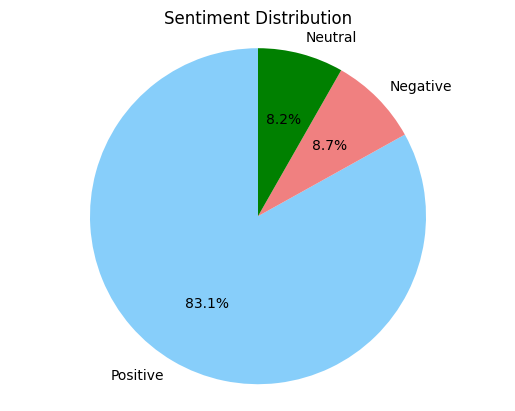

In [47]:
import matplotlib.pyplot as plt

sentiment_counts = Main_data['Class'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['lightskyblue', 'lightcoral','green']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title("Sentiment Distribution")
plt.show()

In [48]:
clean_data = pd.read_csv(r"/content/drive/MyDrive/Sports_and_outdoors_datafinal.csv")

In [57]:
clean_data.head()

,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,reviewerID,title,category,price,brand,sentiment,Negative,Neutral,Positive,compound,year,month
0,Positive,0000031895,described fit year old grand daughter perfectl...,Lamb612000,5.0,1.391213e+09,2014-02-01,A23K73OVXJ04EG,Girls Ballet Tutu Neon Blue,"['Sports & Outdoors', 'Sports & Fitness', 'Oth...",6.54,Bububibi,Positive,0.000,0.325,0.675,0.9712,2014,2
1,Positive,0000031895,cute went great halloween costume price asked ...,Courtney R,4.0,1.384906e+09,2013-11-20,A2681T699HV6H1,Girls Ballet Tutu Neon Blue,"['Sports & Outdoors', 'Sports & Fitness', 'Oth...",6.54,Bububibi,Positive,0.121,0.448,0.431,0.8748,2013,11
2,Positive,0000031895,item cheaply made full like picture resembles ...,Julie Ortiz,1.0,1.477008e+09,2016-10-21,A374PA18DCGS5Y,Girls Ballet Tutu Neon Blue,"['Sports & Outdoors', 'Sports & Fitness', 'Oth...",6.54,Bububibi,Negative,0.000,0.762,0.238,0.3612,2016,10
3,Positive,0000031895,cute,Denise M.,5.0,1.476749e+09,2016-10-18,A14PVW2N5YBWSA,Girls Ballet Tutu Neon Blue,"['Sports & Outdoors', 'Sports & Fitness', 'Oth...",6.54,Bububibi,Positive,0.000,0.000,1.000,0.4588,2016,10
4,Negative,0000031895,full picture suggests smells like rotten fish ...,Danielle Zollar,1.0,1.476662e+09,2016-10-17,A2KWBC44QI2567,Girls Ballet Tutu Neon Blue,"['Sports & Outdoors', 'Sports & Fitness', 'Oth...",6.54,Bububibi,Negative,0.258,0.547,0.195,-0.2023,2016,10


In [56]:
clean_data.drop(columns=["Unnamed: 0"],inplace=True)


In [67]:
clean_data.dropna(inplace=True)

In [59]:
clean_data.rename(columns = {'Class':'Sentiment_Class'}, inplace = True)

In [96]:
from sklearn.preprocessing import LabelEncoder
X = clean_data['reviewText'][:150000]
y = clean_data['Sentiment_Class'][:150000]

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
myvector = TfidfVectorizer()
X_train = myvector.fit_transform(X_train)
X_test = myvector.transform(X_test)
lr1 = LogisticRegression(max_iter=200, verbose = 1)
ovr = OneVsRestClassifier(lr1)
ovr.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.1s finished


OneVsRestClassifier(estimator=LogisticRegression(max_iter=200, verbose=1))

In [80]:
y_pred = ovr.predict(X_test)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      3769
     Neutral       0.00      0.00      0.00      3829
    Positive       0.83      1.00      0.91     37402

    accuracy                           0.83     45000
   macro avg       0.28      0.33      0.30     45000
weighted avg       0.69      0.83      0.75     45000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
y_actual = ovr.predict(X_train)

In [83]:
print(classification_report(y_train, y_actual))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      8648
     Neutral       0.00      0.00      0.00      9187
    Positive       0.83      1.00      0.91     87165

    accuracy                           0.83    105000
   macro avg       0.28      0.33      0.30    105000
weighted avg       0.69      0.83      0.75    105000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


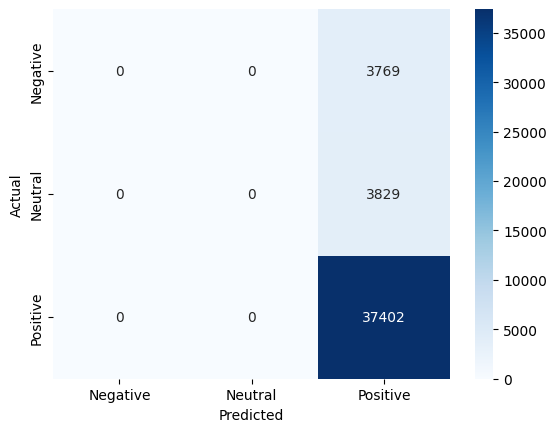

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = ovr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
x1 = myvector.fit_transform(X)
scores = cross_val_score(lr1,x1,y,cv=5)
print("Cross-validation scores: {}".format(scores))
mean_score = np.mean(scores)
std_score = np.std(scores)
print("Mean cross-validation score: {:.2f}".format(mean_score))
print("Standard deviation of cross-validation score: {:.2f}".format(std_score))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
 

Cross-validation scores: [0.83046667 0.82273333 0.81283333 0.82603333 0.82566667]
Mean cross-validation score: 0.82
Standard deviation of cross-validation score: 0.01


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.8s finished


In [100]:
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB().fit(X_train, y_train)
y_pred1 = model_nb.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      3769
     Neutral       0.00      0.00      0.00      3829
    Positive       0.83      1.00      0.91     37402

    accuracy                           0.83     45000
   macro avg       0.28      0.33      0.30     45000
weighted avg       0.69      0.83      0.75     45000



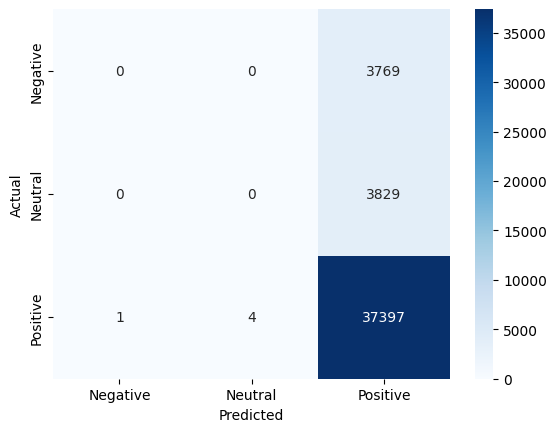

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred1)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [104]:
X_train = [str(item) for item in X_train]
X_test = [str(item) for item in X_test]

In [105]:
from sklearn.tree import DecisionTreeClassifier
dcc = DecisionTreeClassifier(max_depth=7,random_state=42)
tfidf = TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,stop_words=stopwords.words("english"),use_idf=True,smooth_idf=True)
x_train_1 = tfidf.fit_transform(X_train)
x_test_1 = tfidf.transform(X_test)
ovr_1 = OneVsRestClassifier(dcc).fit(x_train_1,y_train)
y_predicted_2 = ovr_1.predict(x_test_1)

In [106]:
print(classification_report(y_test, y_predicted_2))

              precision    recall  f1-score   support

    Negative       0.12      0.01      0.01      3769
     Neutral       0.03      0.00      0.00      3829
    Positive       0.83      0.99      0.90     37402

    accuracy                           0.83     45000
   macro avg       0.33      0.33      0.31     45000
weighted avg       0.70      0.83      0.75     45000



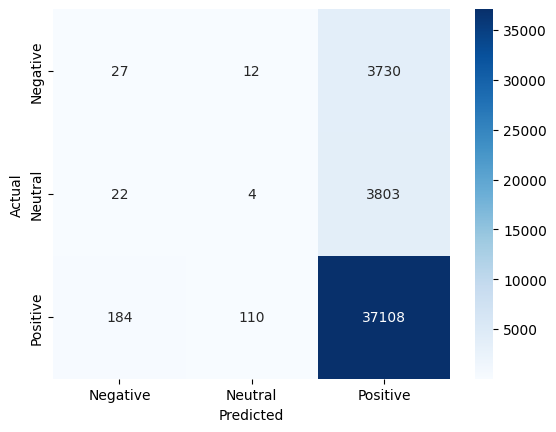

In [107]:
cm = confusion_matrix(y_test, y_predicted_2)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()